**Аналитика средствами Python**

 Есть файлы, в которых содержатся результаты запросов.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

# Аналитика

In [4]:
# импорты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# выгрузим датасеты и посмотрим на данные
try:
    request_1 = pd.read_csv('query_1.csv')
    request_3 = pd.read_csv('query_3.csv')
except:
    request_1 = pd.read_csv('/datasets/query_1.csv')
    request_3 = pd.read_csv('/datasets/query_3.csv')

request_1.info()
request_3.info()

display(request_1)
display(request_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


## Вывод
Даны 2 датасета: 1 с количеством рейсов для каждой модели самолета в сентябре 2018 (2 столбца 8 строк), 2 среднее количество прибывающих самолетов в день для каждого города за сентябрь 2018 (2 столбца 101 строка). Данные находяться в нужных типах в обеих таблицах, что позволяет сразу приступить к следующему этапу работ.

In [6]:
# топ 10 городов
сity_top_10 = request_3.sort_values('average_flights', ascending = False).head(10).reset_index(drop = True)
display(сity_top_10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


# Графики

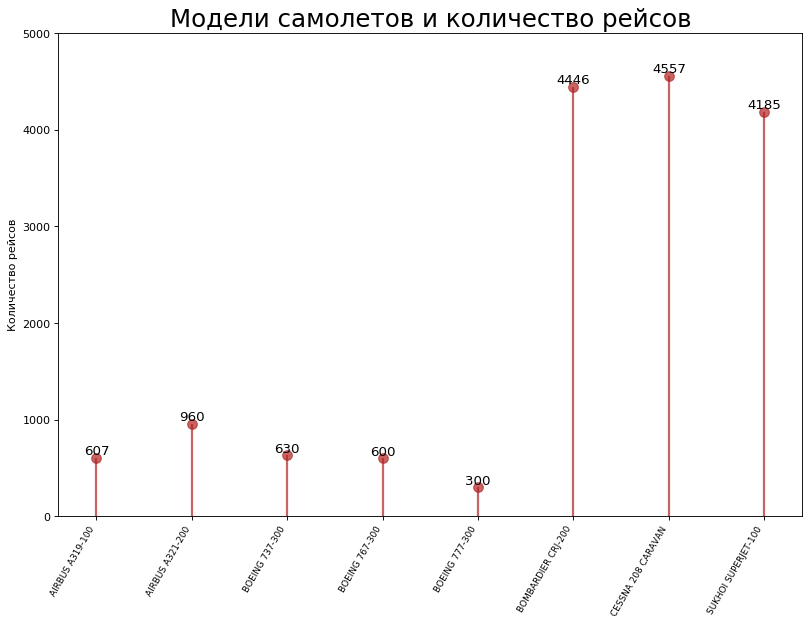

In [7]:
def plot_data(data, col_x, col_y, el, max_y):
    fig, ax = plt.subplots(figsize = (12,8), facecolor = 'white', dpi = 80)
    ax.vlines(x = data[col_x], ymin = 0, ymax = data[col_y], color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x = data[col_x], y = data[col_y], s = 75, color='firebrick', alpha=0.7)
    
    ax.set_title(el + ' и количество рейсов', fontdict={'size':22})
    ax.set(ylabel='Количество рейсов', ylim = (0, max_y))
    ax.set_xticks(data[col_x])
    ax.set_xticklabels(data[col_x].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':8})

    for row in data.itertuples():
        ax.text(row[1], row[2]+1, s = round(row[2], 2),
                horizontalalignment= 'center', 
            verticalalignment='bottom',fontsize=12)
    plt.show()

plot_data(request_1, 'model', 'flights_amount', 'Модели самолетов', 5000)

## Вывод
 Как мы можем увидить на графике, из общего списка выделяются 3 самые используемые модели (`Bombardier CRJ-200`,`Cessna 208 Caravan`,`Sukhoi SuperJet-100`), несложным `гуглением` мы находим информация об этих воздушных судах. Посмотрев на них 'поближе', мы понимаем, что имеем дело с самолетами для коротких дистанций, соответственно рейсов за день они совершают в разы больше, своих 'больших' аналогов: таких как Boeing и Airbus.

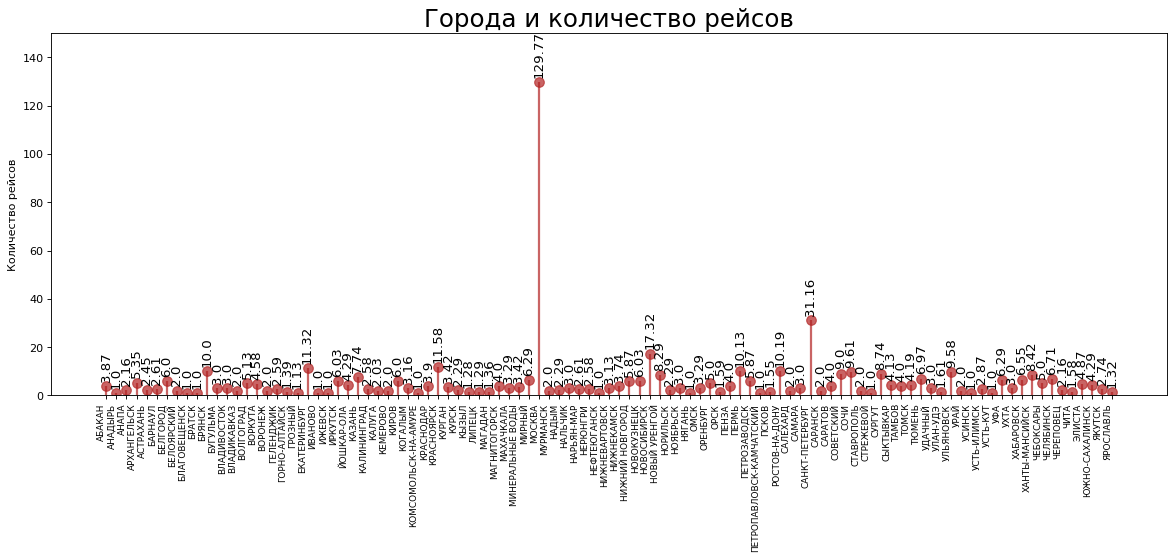

In [8]:
def plot_data2(data, col_x, col_y, el, max_y):
    fig, ax = plt.subplots(figsize = (18,6), facecolor = 'white', dpi = 80)
    ax.vlines(x = data[col_x], ymin = 0, ymax = data[col_y], color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x = data[col_x], y = data[col_y], s = 75, color='firebrick', alpha=0.7)
    
    ax.set_title('Города и количество рейсов', fontdict={'size':22})
    ax.set(ylabel='Количество рейсов', ylim = (0, max_y))
    ax.set_xticks(data[col_x])
    ax.set_xticklabels(data[col_x].str.upper(), rotation=90, fontdict={'horizontalalignment': 'right', 'size':8})

    for row in data.itertuples():
        ax.text(row[1], row[2]+2, s = round(row[2], 2),
                horizontalalignment= 'center', 
            verticalalignment='bottom',fontsize=12, rotation=90)
    plt.show()
    
plot_data2(request_3, 'city', 'average_flights', 'Города', 150)

## Вывод
Не сложно отыскать в этом топе `Москву` и `Санкт-Петербург` остальные города довольно сильно сливаются в общей массе рейтинга. Лучше поискать более детальную инфомацию в сжатом, отсортированном по убыванию рейтинге.

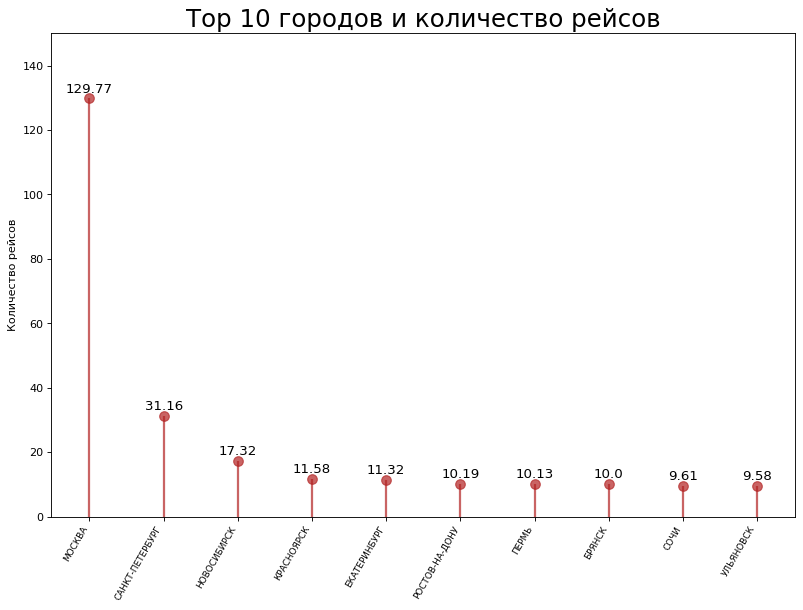

In [9]:
plot_data(сity_top_10, 'city', 'average_flights', 'Top 10 городов', 150)

## Вывод
Этот график уже намного лучше раскрывает картину рейтинга, теперь сперва незамеченные `Новосибирск`, `Красноярск` и `Екатеринбург` уверенно входят в топ 5.

# Общий Вывод
Как видно на графиках `Москва` - безоговорочный лидер в посещяемости во время крупных мероприятий, `Санкт-Петербург` отстает от лидера практически в 4 раза по кол-ву рейсов. Так же мы видим по графику самолетов, что летят в `Москву` в основном из близлежащих регионов, это доказано соразмерным количеством, малогабаритных и 'недалеколетающих' самолетов. Данная статистка показывает: насколько важно продумывать логистику крупных мероприятий проводимых как в столице, так и в ее 'северном аналоге'. 